# CNN for Image Classification

In this lab, you are given a dataset containing 6,000 pictures of cats and dogs (3,000 cats, 3,000 dogs) and asked to train a classifier built upon Convolutional Neural Networks (ConvNets) to classify images as "dogs" or "cats".

In [1]:
%matplotlib inline

import os
import numpy as np
import matplotlib.pyplot as plt
import cv2

import tensorflow as tf
import keras
from keras import metrics
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import RMSprop
from sklearn.model_selection import train_test_split

import pandas as pd
from pandas import Series, DataFrame

Using TensorFlow backend.


### Exercise 1 
Split the dataset by selecting 4,800 pictures for training, 600 for validation, and 600 for testing.

In [2]:
img_width = 50
img_height = 50
num_classes = 2
DATA_DIR = './data/'

image_filenames = [DATA_DIR+i for i in os.listdir(DATA_DIR)] # use this for full dataset
#Defines for Labels
LABEL_CAT = 0
LABEL_DOG = 1

np.random.seed(1234)
#Generate list of labels for the images
label = lambda x: LABEL_CAT if "cat" in x else LABEL_DOG
labels = [label(name) for name in image_filenames]

#split data twice to get validation and testing sets
xtrain, xtest, y_train, y_test = train_test_split(image_filenames, labels, test_size=0.2, random_state=1234)
xval, xtest, y_val, y_test = train_test_split(xtest, y_test, test_size=0.5, random_state=1234)
# make sure that the image filenames have a fixed order before shuffling
#Actually read in the images, resize them, and convert pixel values to between 0 and 1
x_train = [cv2.resize(cv2.imread(name), (img_width, img_height))/255 for name in xtrain]
x_val = [cv2.resize(cv2.imread(name), (img_width, img_height))/255 for name in xval]
x_test = [cv2.resize(cv2.imread(name), (img_width, img_height))/255 for name in xtest]

### Exercise 2
Train a Convolutional Neural Network (ConvNet) on the training set. The general structure of the ConvNet will be a stack of alternated Conv2D (with relu activation) and MaxPooling2D layers. A Conv2D layer creates a convolution kernel that is convolved with the layer input to produce a tensor of outputs. A MaxPooling2D layer is used to downscale input in both the vertical and horizontal dimensions.

In [3]:
# Add your code here
import tensorflow as tf
tf.set_random_seed(1234)

#Simple model with 2 sets of Conv2d and Max Pooling layers
model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=(img_width,img_height,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

#Flatten to get 1D structure
model.add(Flatten())
#Fully connected layer
model.add(Dense(32))
model.add(Activation('relu'))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

hist = model.fit(x=np.array(x_train), y=y_train, batch_size=64, epochs=10, verbose=1, validation_data=(np.array(x_val),y_val))

model.summary()


Train on 4800 samples, validate on 600 samples
Epoch 1/10
4800/4800 [==============================] - 8s 2ms/step - loss: 0.7021 - acc: 0.5592 - val_loss: 0.6627 - val_acc: 0.6450
Epoch 2/10
4800/4800 [==============================] - 8s 2ms/step - loss: 0.6365 - acc: 0.6492 - val_loss: 0.7293 - val_acc: 0.5517
Epoch 3/10
4800/4800 [==============================] - 9s 2ms/step - loss: 0.5778 - acc: 0.7092 - val_loss: 0.5775 - val_acc: 0.7017
Epoch 4/10
4800/4800 [==============================] - 8s 2ms/step - loss: 0.5469 - acc: 0.7181 - val_loss: 0.5603 - val_acc: 0.6867
Epoch 5/10
4800/4800 [==============================] - 8s 2ms/step - loss: 0.5017 - acc: 0.7617 - val_loss: 0.5495 - val_acc: 0.7267
Epoch 6/10
4800/4800 [==============================] - 8s 2ms/step - loss: 0.4690 - acc: 0.7767 - val_loss: 0.5254 - val_acc: 0.7317
Epoch 7/10
4800/4800 [==============================] - 8s 2ms/step - loss: 0.4385 - acc: 0.7944 - val_loss: 0.5441 - val_acc: 0.6950
Epoch 8/10
4800

### Exercise 3

Output the training/validation loss and accuracy curves. Also print the classification results (e.g., classification accuracy, confusion matrix, precision-recall curves and/or ROC curves) on the test set.

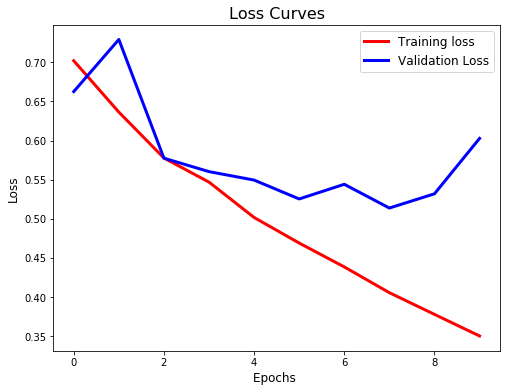

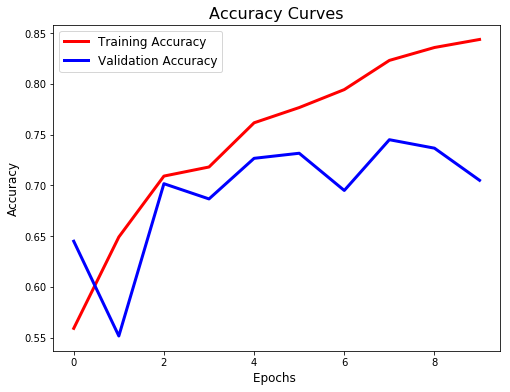

'\nLooking at the curves, we can see the on the loss graph, the validation loss is higher than the training loss, and on the \naccuracy graph, we can see that the validation accuracy is smaller than the training accuracy. This suggests that we \ncould be underfitting the data, and a more complex model is needed.\n'

In [4]:
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve, roc_curve
from sklearn.utils.fixes import signature

#Plot loss on training set vs loss on validation set
plt.figure(figsize=[8,6])
plt.plot(hist.history['loss'],'r',linewidth=3.0)
plt.plot(hist.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=12)
plt.xlabel('Epochs ',fontsize=12)
plt.ylabel('Loss',fontsize=12)
plt.title('Loss Curves',fontsize=16)
plt.show()

#Plot accuracy on training set vs accuracy on validation set
plt.figure(figsize=[8,6])
plt.plot(hist.history['acc'],'r',linewidth=3.0)
plt.plot(hist.history['val_acc'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=12)
plt.xlabel('Epochs ',fontsize=12)
plt.ylabel('Accuracy',fontsize=12)
plt.title('Accuracy Curves',fontsize=16)
plt.show()

"""
Looking at the curves, we can see the on the loss graph, the validation loss is higher than the training loss, and on the 
accuracy graph, we can see that the validation accuracy is smaller than the training accuracy. This suggests that we 
could be underfitting the data, and a more complex model is needed.
"""

600/600 [==============================] - 0s 451us/step
Accuracy on test set: 73.000%
              precision    recall  f1-score   support

           0       0.83      0.57      0.68       297
           1       0.68      0.89      0.77       303

   micro avg       0.73      0.73      0.73       600
   macro avg       0.76      0.73      0.72       600
weighted avg       0.75      0.73      0.72       600

[[169 128]
 [ 34 269]]


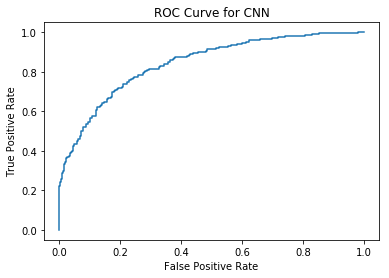

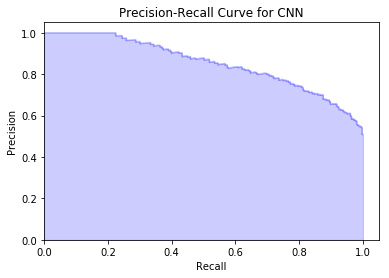

In [5]:
#Print the accuracy on the test set
loss, accuracy = model.evaluate(np.array(x_test), y_test, verbose=1)
print('Accuracy on test set: {:.3%}'.format(accuracy))

preds = model.predict_classes(np.array(x_test))
print (classification_report(y_test, preds))
print(confusion_matrix(y_test, preds))

probs = model.predict_proba(np.array(x_test))

def plot_roc(probs):
    fpr_p, tpr_p, thresholds_p = roc_curve(y_test, probs, pos_label=1)
    
    plt.plot(fpr_p, tpr_p)
    plt.title('ROC Curve for CNN')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.show()

plot_roc(probs[:,0])

def plot_pr(probs):
    precision, recall, _ = precision_recall_curve(y_test, probs, pos_label=1)
    step_kwargs = ({'step': 'post'}
               if 'step' in signature(plt.fill_between).parameters
               else {})
    plt.step(recall, precision, color='b', alpha=0.2,
             where='post')
    plt.fill_between(recall, precision, alpha=0.2, color='b', **step_kwargs)

    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.05])
    plt.title('Precision-Recall Curve for CNN')
    plt.show()
    
plot_pr(probs[:,0])

### Exercise 4

Explore different network architectures (e.g., stacking 4 Conv2D+MaxPooling2D layers) and various ways in tuning the model parameters to see if you can improve the model performance on the validation set.

In [6]:
# Add your code here

#More complex model with 4 stacked Conv2D+MaxPooling layers + increasing number of filters
model2 = Sequential()

model2.add(Conv2D(32, (3, 3), activation='relu', input_shape=(img_width, img_height, 3)))
#model2.add(Conv2D(32, (3, 3), activation='relu'))
#model2.add(Conv2D(32, (3, 3), activation='relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))
#Add dropout after each Conv2D+MaxPooling layer to try prevent overfitting
model2.add(Dropout(0.25))

model2.add(Conv2D(64, (3, 3), activation='relu'))
#model2.add(Conv2D(64, (3, 3), activation='relu'))
#model2.add(Conv2D(64, (3, 3), activation='relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Dropout(0.25))

model2.add(Conv2D(128, (3, 3), activation='relu'))
#odel2.add(Conv2D(128, (3, 3), activation='relu'))
#odel2.add(Conv2D(128, (3, 3), activation='relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Dropout(0.25))

model2.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
#odel2.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))

#Flatten to 1D structure
model2.add(Flatten())
#2 Fully connected Dense Layers
model2.add(Dense(256, activation='relu'))
model2.add(Dropout(0.5))

model2.add(Dense(128, activation='relu'))
model2.add(Dropout(0.25))

model2.add(Dense(1, activation='sigmoid'))

#Try to decrease learning rate to increase performance
model2.compile(loss="binary_crossentropy",
              optimizer=RMSprop(lr=0.0003),
              metrics=["accuracy"])

hist2 = model2.fit(x=np.array(x_train), y=y_train, batch_size=64, epochs=10, verbose=1, validation_data=(np.array(x_val),y_val))


Train on 4800 samples, validate on 600 samples
Epoch 1/10
4800/4800 [==============================] - 13s 3ms/step - loss: 0.6965 - acc: 0.5050 - val_loss: 0.6926 - val_acc: 0.5250
Epoch 2/10
4800/4800 [==============================] - 12s 3ms/step - loss: 0.6911 - acc: 0.5219 - val_loss: 0.6878 - val_acc: 0.5600
Epoch 3/10
4800/4800 [==============================] - 11s 2ms/step - loss: 0.6809 - acc: 0.5640 - val_loss: 0.6872 - val_acc: 0.5350
Epoch 4/10
4800/4800 [==============================] - 10s 2ms/step - loss: 0.6707 - acc: 0.5917 - val_loss: 0.6681 - val_acc: 0.6017
Epoch 5/10
4800/4800 [==============================] - 10s 2ms/step - loss: 0.6619 - acc: 0.6012 - val_loss: 0.6574 - val_acc: 0.6267
Epoch 6/10
4800/4800 [==============================] - 10s 2ms/step - loss: 0.6515 - acc: 0.6215 - val_loss: 0.6513 - val_acc: 0.6533
Epoch 7/10
4800/4800 [==============================] - 11s 2ms/step - loss: 0.6397 - acc: 0.6298 - val_loss: 0.6391 - val_acc: 0.6550
Epoch 8/

### Exercise 5

Apply the trained model on the testing set and output the classification results.

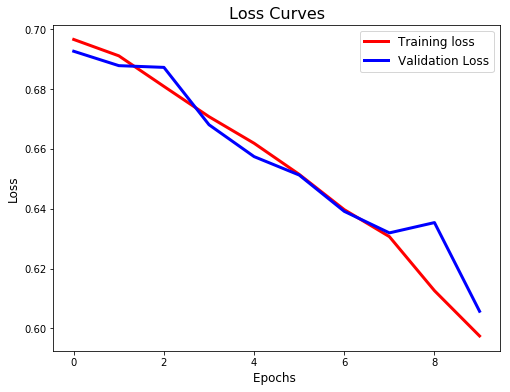

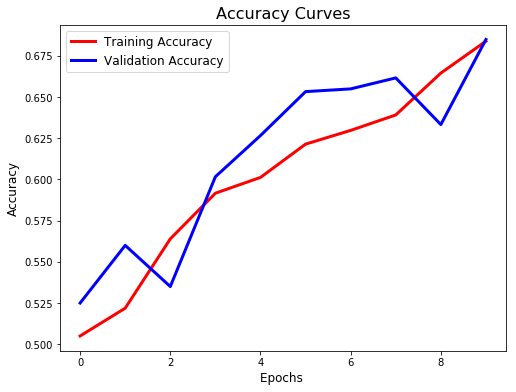

In [7]:
# Add your code here
plt.figure(figsize=[8,6])
plt.plot(hist2.history['loss'],'r',linewidth=3.0)
plt.plot(hist2.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=12)
plt.xlabel('Epochs ',fontsize=12)
plt.ylabel('Loss',fontsize=12)
plt.title('Loss Curves',fontsize=16)
plt.show()

plt.figure(figsize=[8,6])
plt.plot(hist2.history['acc'],'r',linewidth=3.0)
plt.plot(hist2.history['val_acc'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=12)
plt.xlabel('Epochs ',fontsize=12)
plt.ylabel('Accuracy',fontsize=12)
plt.title('Accuracy Curves',fontsize=16)
plt.show()

"""
Looking at the new loss/accuracy curves, we can see that the training/validation lines are much closer together than for
the previous model, however there is not much difference in performance on the test set. This suggests that a the model 
could potentially still be improved.
"""

600/600 [==============================] - 0s 530us/step
Accuracy on test set: 69.667%
              precision    recall  f1-score   support

           0       0.65      0.85      0.73       297
           1       0.79      0.55      0.65       303

   micro avg       0.70      0.70      0.70       600
   macro avg       0.72      0.70      0.69       600
weighted avg       0.72      0.70      0.69       600

[[252  45]
 [137 166]]


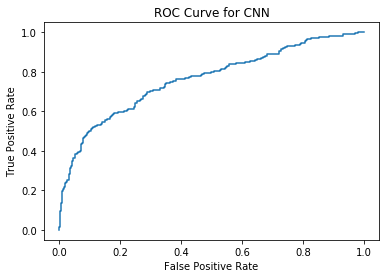

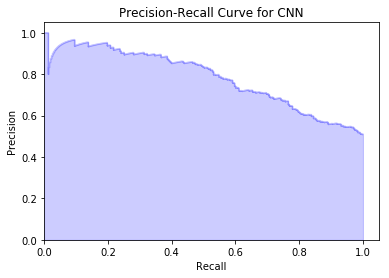

In [8]:
#Print the accuracy on the test set
loss, accuracy = model2.evaluate(np.array(x_test), y_test, verbose=1)
print('Accuracy on test set: {:.3%}'.format(accuracy))

preds2 = model2.predict_classes(np.array(x_test))
print (classification_report(y_test, preds2))
print(confusion_matrix(y_test, preds2))

probs2 = model2.predict_proba(np.array(x_test))
plot_roc(probs2[:,0])
plot_pr(probs2[:,0])

### Exercise 6 

Plot the saliency map of original image to see which part is important for making classification decisions. You can refer to the following blog article on how to generate visualisation results of the filters in the ConvNets.
https://blog.keras.io/how-convolutional-neural-networks-see-the-world.html

In [17]:
# Add your code here
layer_dict = dict([(layer.name, layer) for layer in model2.layers])

from keras import backend as K

layer_name = 'conv2d_6'
filter_index = 0  # can be any integer from 0 to 511, as there are 512 filters in that layer
input_img = model2.input
# build a loss function that maximizes the activation
# of the nth filter of the layer considered
layer_output = layer_dict[layer_name].output
loss = K.mean(layer_output[:, :, :, filter_index])

# compute the gradient of the input picture wrt this loss
grads = K.gradients(loss, input_img)[0]

# normalization trick: we normalize the gradient
grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

# this function returns the loss and grads given the input picture
iterate = K.function([input_img], [loss, grads])

import numpy as np

# we start from a gray image with some noise
input_img_data = np.random.random((1, img_width, img_height, 3)) * 20 + 128.
# run gradient ascent for 20 steps
for i in range(20):
    loss_value, grads_value = iterate([input_img_data])
    input_img_data += grads_value * i
    
from scipy.misc import imsave

# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
#     x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

img = input_img_data[0]
img = deprocess_image(img)
imsave('%s_filter_%d.png' % (layer_name, filter_index), img)


/local/java/python-pip-packages.cs909/lib/python3.6/site-packages/ipykernel_launcher.py:53: DeprecationWarning: `imsave` is deprecated!
`imsave` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imwrite`` instead.


In [13]:
model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 48, 48, 32)        896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 24, 24, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 22, 22, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 11, 11, 64)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 11, 11, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 9, 9, 128)         73856     
__________

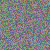

In [23]:
from IPython.display import Image
Image("conv2d_6_filter_0.png")
